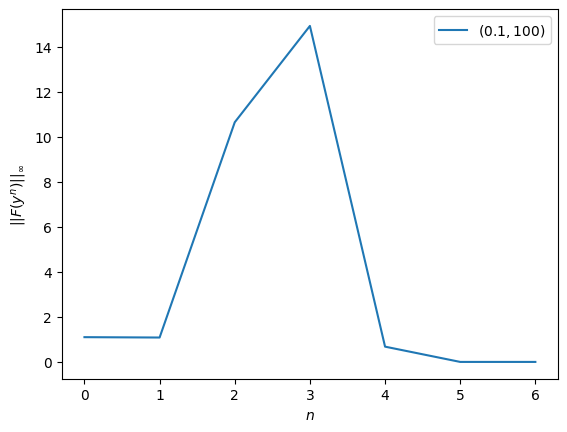

In [47]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt


def f_funct(y_arr, lambda_val):
    ret_arr = np.diff(y_arr, n=1, prepend=1) - np.diff(y_arr, n=1, append=1) - lambda_val * np.exp(y_arr / (1+2*y_arr))
    return ret_arr


def f_deriv(y_arr, lambda_val):
    length = len(y_arr)
    data0 = -np.ones_like(y_arr)
    data1 = 2 - lambda_val * np.exp(y_arr / (1+2*y_arr)) / (1+2*y_arr)**2
    data2 = -np.ones_like(y_arr)
    data = np.array([data0, data1, data2])
    ret_arr = sparse.dia_array((data, [-1, 0, 1]), shape=(length, length)).tocsc()
    return ret_arr


def newton(lambda_val, m_val, funct, deriv):
    x_arr = np.zeros(m_val)
    norm = np.linalg.norm(funct(x_arr, lambda_val), ord=np.inf)
    norm_list = [norm]
    while norm > 10**-5:
        a_arr = deriv(x_arr, lambda_val)
        f_arr = funct(x_arr, lambda_val)

        x_arr -= sparse.linalg.spsolve(a_arr, f_arr)

        # a_inv = sparse.linalg.inv(a_arr)
        # x_arr -= a_inv@f_arr

        norm = np.linalg.norm(funct(x_arr, lambda_val), ord=np.inf)
        norm_list.append(norm)
    return norm_list


newton0 = newton(0.1, 100, f_funct, f_deriv)

fig, ax = plt.subplots()
ax.plot(newton0, label='$(0.1, 100)$')
ax.set(xlabel='$n$', ylabel='$||F(y^n)||_\infty$')
ax.legend()

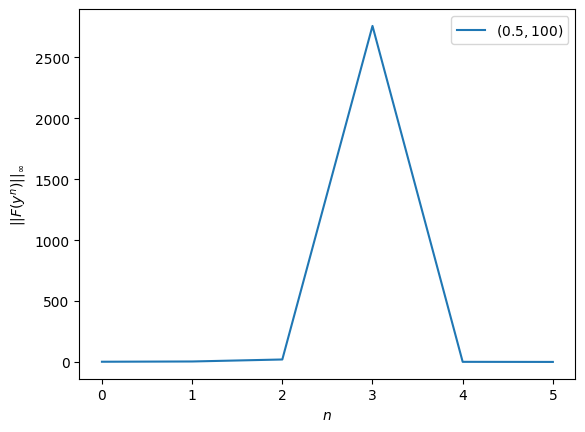

In [48]:
newton1 = newton(0.5, 100, f_funct, f_deriv)

fig, ax = plt.subplots()
ax.plot(newton1, label='$(0.5, 100)$')
ax.set(xlabel='$n$', ylabel='$||F(y^n)||_\infty$')
ax.legend()

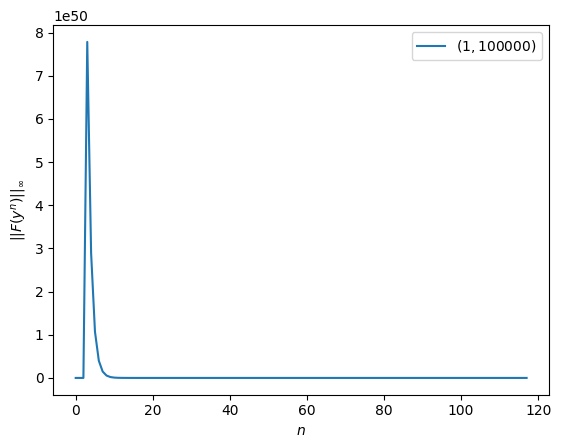

In [49]:
newton2 = newton(1, 100000, f_funct, f_deriv)

fig, ax = plt.subplots()
ax.plot(newton2, label='$(1, 100000)$')
ax.set(xlabel='$n$', ylabel='$||F(y^n)||_\infty$')
ax.legend()